#Lista 1 Modelagem e simulação
Pedro Trevisan de Oliveira
Exercicios sobre cadeias de markov usando o método de Monte Carlo

Resumindo, realizamos a análise probabilística de eventos onde a probabilidade do próximo estado depende somente do estado atual. Monte Carlo é uma técnica baseada em simulações aleatórias para estimar quantidades estatísticas, logo ambos se complementam para modelga/simulação estatistica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Questão 1

Plote um gráfico de T por N, onde T é o tempo médio que demora para conseguirmos
pelo menos N caras consecutivas em uma sequência de lançamentos consecutivos de
moedas. b) Agora, fixando N = 3, plote a função de distribuição de probabilidade (p.d.f.) da
variável aleatória “X = número de lançamentos necessários para conseguir 3 caras
consecutivas”. Isto é, plote o histograma que mostre quantas vezes foram necessários 3, 4,
5, 6, (etc) lançamentos. Isso equivale à p.d.f. da variável aleatória X

In [ ]:
#casos = ['head','tail']
lancamentos= 1
moeda = [0,0]
for i in range(lancamentos):
  sorteio = np.random.choice([0,1])
  moeda[sorteio] +=1
print(moeda)

[1, 0]


o codigo a seguir simula o lançamento de uma moeda até que se obtenham n caras (0) consecutivas.

In [ ]:
#casos = ['head','tail']

moeda = [0,0]
sequencia = []
lancamentos = 10000
n = 3
repeticoes = 0
caras = 0

for i in range(lancamentos):
  sorteio = np.random.choice([0,1])
  moeda[sorteio] +=1
  sequencia = np.append(sequencia,sorteio)
  repeticoes +=1
  if sorteio == 0:
    caras +=1
    if caras == n: break
  else: caras = 0


print(sequencia)
print(repeticoes)
print(moeda)

[1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
10
[6, 4]


Análise do tempo medio para um jogador retirar N caras consecutivas

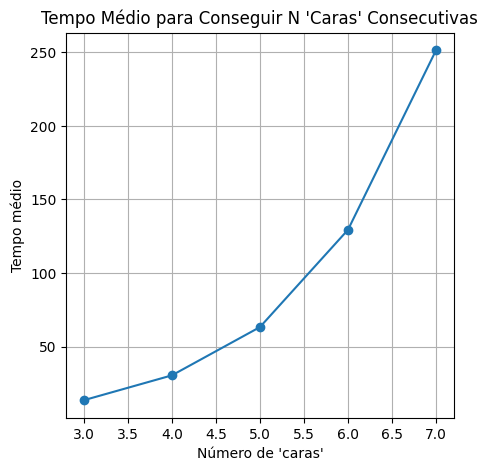

In [ ]:
def tempo_medio_para_n_caras(n, repeticoes, lancamentos):
    tempos = []

    for i in range(repeticoes):
        tempo = 0
        caras = 0
        for i in range(lancamentos):
            sorteio = np.random.choice([0,1])
            tempo += 1
            if sorteio == 0:
                caras += 1
                if caras == n:
                    tempos.append(tempo)
                    break
            else:
                caras = 0

    return np.mean(tempos)


repeticoes=1000     #iterações
lancamentos=10000   #max de jogadas
n_valores = [3,4,5,6,7]
tempos_medios = []

for n in n_valores:
  tempos_medios.append(tempo_medio_para_n_caras(n,repeticoes,lancamentos))



plt.figure(figsize=(5,5))
plt.plot(n_valores, tempos_medios, marker='o')
plt.xlabel("Número de 'caras'")
plt.ylabel("Tempo médio")
plt.title("Tempo Médio para Conseguir N 'Caras' Consecutivas")
plt.grid()
plt.show()

b) probabilidade 3 caras consecutivas

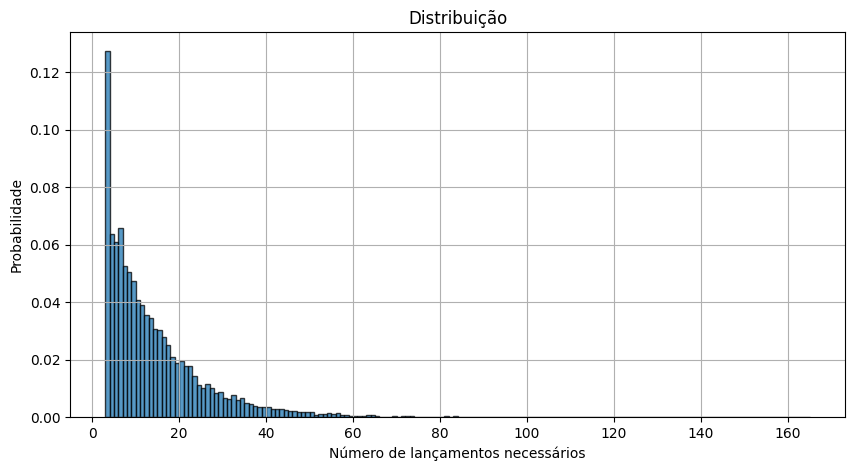

In [ ]:

def simular_lancamentos(n, repeticoes=10000, lancamentos=10000):
    resultados = []

    for i in range(repeticoes):
        tempo = 0
        caras = 0

        for j in range(lancamentos):
            sorteio = np.random.choice([0, 1])  #0 = cara, 1 = coroa
            tempo += 1

            if sorteio == 0:
                caras += 1
                if caras == n:
                    resultados.append(tempo)
                    break
            else:
                caras = 0

    return resultados



n = 3
repeticoes = 10000
dados = simular_lancamentos(n, repeticoes)


plt.figure(figsize=(10,5))
plt.hist(dados, bins=range(min(dados), max(dados) + 1), density=True, alpha=0.75, edgecolor='black')
plt.xlabel("Número de lançamentos necessários")
plt.ylabel("Probabilidade")
plt.title("Distribuição")
plt.grid()
plt.show()

# **Questão 2**

No jogo Dungeons & Dragons, quando um jogador ataca um monstro, ele deve rolar um
dado de 20 lados (chamado de d20). a) Uma habilidade chamada “Vantagem” permite que o
jogador jogue 2 dados d20 e escolha o melhor resultado. Na média, quão melhor é uma
rolagem usando “Vantagem” do que uma rolagem comum (de apenas um dado)? b) Suponha
que um ataque como descrito acima acerta o monstro se o resultado obtido na rolagem for
maior ou igual que a defesa do monstro (D). Em outras palavras, um ataque é bem sucedido se
e somente se d20 >= D. Plote 2 gráficos de A por D, onde A é a porcentagem de ataques
bem-sucedidos e D é o valor de defesa do monstro variando de 1 a 20, uma linha
representando o ataque sem Vantagem e outra com Vantagem (veja exemplo do tipo de
gráfico abaixo). c) Você diria que a importância da habilidade “Vantagem” muda conforme D
aumenta?

In [ ]:
#d20 = d {1,...,20}

def d20():
    return np.random.choice(range(1, 21))

print('dado1: ',d20(), '\ndado2: ',d20())
def vantagem():
    return max(d20(), d20())
print('vantagem: ', vantagem())


dado1:  4 
dado2:  20
vantagem:  4


Média Simples:  10.45
Média Vantagem:  13.91


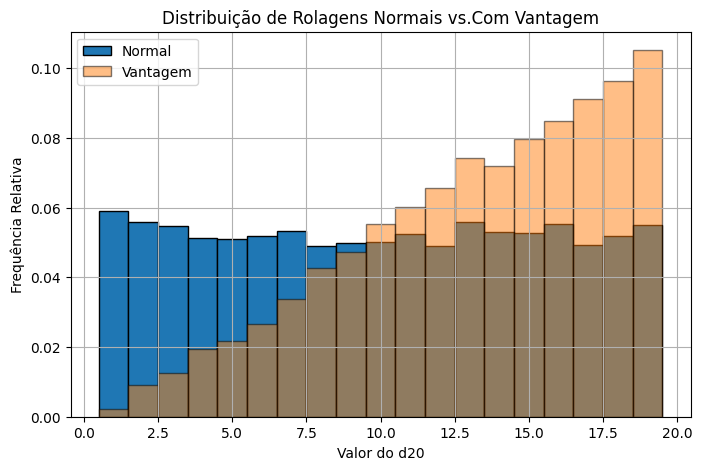

In [ ]:
def d20():
    return np.random.choice(range(1, 21))

def vantagem():
    return max(d20(), d20())

rSimples = []
rVantagem = []

for i in range(10000):
    rSimples.append(d20())
    rVantagem.append(vantagem())

mediaSimples = np.mean(rSimples)
mediaVantagem = np.mean(rVantagem)

print('Média Simples: ', mediaSimples.round(2))
print('Média Vantagem: ', mediaVantagem.round(2))



plt.figure(figsize=(8,5))
plt.hist(rSimples, bins=np.arange(1, 21)-0.5, alpha=1, label='Normal', edgecolor='black', density=True)
plt.hist(rVantagem, bins=np.arange(1, 21)-0.5, alpha=0.5, label='Vantagem', edgecolor='black', density=True)
plt.xlabel("Valor do d20")
plt.ylabel("Frequência Relativa")
plt.title("Distribuição de Rolagens Normais vs.Com Vantagem")
plt.legend()
plt.grid()
plt.show()



Pelo grafico de distribuição podemos perceber que com a vantagem a incidência de valores acima de 10 é maior seguindo uma proporção,
enquanto isso observa-se no caso do d20 normal uma distruibuição uniforme dos valores caracteriza o caso dos dados.

In [ ]:
def d20():
    return np.random.choice(range(1, 21))

def embate(a,b):
    if a >= b: return 1
    else: return 0

def hit(n):
  a = d20()
  d = n
  resultado = embate(a,d)
  return resultado

n_valores = [3,5,7,10,15,19]
rodadas = 10000
hit_rate = []
for n in n_valores:
    hit_rate.append(np.mean([hit(n) for i in range(rodadas)]))


print(hit_rate)







[0.8987, 0.8016, 0.6961, 0.548, 0.2971, 0.0986]


#Questão 3

N moedas e R relançamentos, e suponha o seguinte experimento:
Você lança todas as N moedas aleatoriamente e elas saem como cara ou coroa. Então, você
faz R relançamentos, que consistem em selecionar apenas as moedas que saíram como
coroa e lançá-las novamente. Plote o número de coroas restantes em função de N e R.

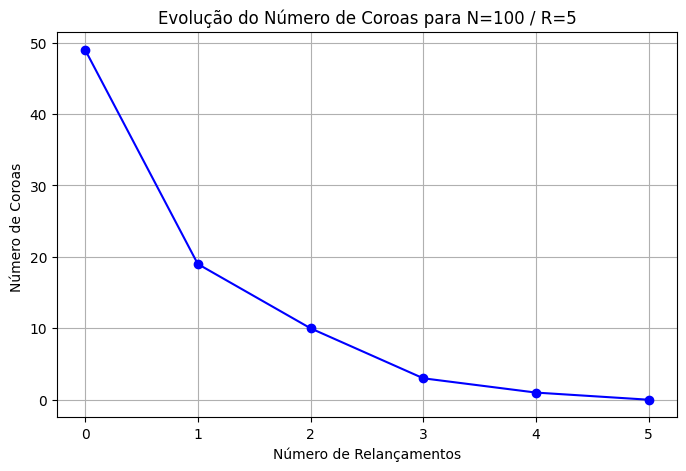

In [ ]:
def simular_lancamentos(lancamentos, num_relancamentos):
    moedas = np.random.choice([0, 1], size=lancamentos)  # coroa = 0
    coroas = [np.sum(moedas == 0)]

    for i in range(num_relancamentos):
        relancamentos = np.random.choice([0,1], size=lancamentos)
        moedas[moedas == 0] = relancamentos[moedas == 0]
        coroas.append(np.sum(moedas == 0))

    return coroas

lancamentos = 100
num_relancamentos = 5

resultados = simular_lancamentos(lancamentos, num_relancamentos)

plt.figure(figsize=(8,5))
plt.plot(range(num_relancamentos+1), resultados, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Relançamentos')
plt.ylabel('Número de Coroas ')
plt.title(f'Evolução do Número de Coroas para N={lancamentos} / R={num_relancamentos}')
plt.grid()
plt.show()

# Questão 4
Mostre por simulação o curioso resultado de que, para um par de filhos A e B, a
probabilidade de que ambos sejam do sexo masculino dado que um deles é do sexo masculino
não é 50%.

In [ ]:
simulacoes = 1000

filhos = np.random.choice([0, 1], size=(simulacoes, 2))
um_menino = (filhos[:,0] == 1) | (filhos[:,1] == 1)
dois_meninos = (filhos[:,0] == 1) & (filhos[:,1] == 1)

# P(ambos meninos | pelo menos um menino)
prob = np.sum(dois_meninos & um_menino) / np.sum(um_menino)
print(f"Probabilidade de ambos serem meninos dado que um é menino: {prob:.3f} (~{prob*100:.2f}%)")


Probabilidade de ambos serem meninos dado que pelo menos um é menino: 0.345 (~34.47%)


# Questão 5

Uma questão interessante em teoria de probabilidade é o problema do aniversário, que
versa sobre a probabilidade de 2 pessoas de um grupo fazerem aniversário em um mesmo dia
do ano. a) Plote um gráfico de P por N simulando a probabilidade P de 2 pessoas quaisquer
fizeram aniversário no mesmo dia em um grupo de N pessoas. b) Plote o mesmo gráfico para
3 pessoas.

In [ ]:
def simular_problema_aniversario(max_N=100, num_simulacoes=10000, coincidencias=2):
    probabilidades = []
    for N in range(1, max_N + 1):
        count = 0
        for _ in range(num_simulacoes):
            aniversarios = np.random.randint(0, 365, size=N)
            unicos, contagens = np.unique(aniversarios, return_counts=True)
            if np.any(contagens >= coincidencias):
                count += 1
        probabilidades.append(count / num_simulacoes)
    return probabilidades

def plotar_probabilidades_aniversario():
    max_N = 100
    prob_2_pessoas = simular_problema_aniversario(max_N=max_N, coincidencias=2)
    prob_3_pessoas = simular_problema_aniversario(max_N=max_N, coincidencias=3)

    plt.figure(figsize=(10,6))
    plt.plot(range(1, max_N + 1), prob_2_pessoas, label='≥2 pessoas', color='blue')
    plt.plot(range(1, max_N + 1), prob_3_pessoas, label='≥3 pessoas', color='red')
    plt.xlabel('Número de Pessoas no Grupo (N)')
    plt.ylabel('Probabilidade de Coincidência de Aniversário')
    plt.title('Aniversário ')
    plt.legend()
    plt.grid(True)
    plt.show()

N = 100
R = 10
plotar_resultados(N, R)
simular_filhos()
plotar_probabilidades_aniversario()

# Questão 7

No jogo banco imobiliário, você joga 2d6 (2 dados de 6 lados somados, obtendo um
resultado de 2 a 12) e anda esse número de espaços ao redor do tabuleiro (veja por exemplo
a imagem do tabuleiro no final desta lista). Os espaços com retângulos coloridos representam
propriedades imobiliárias (ignore os efeitos dos outros espaços). a) Considerando que uma
partida de Banco Imobiliário demora um tempo tendendo a infinito (como qualquer pessoa que
já jogou Banco Imobiliário pode confirmar), qual a probabilidade de cairmos em cada
propriedade após um número muito grande de jogadas? Qual a melhor propriedade do jogo?
b) Considerando agora que ao parar no espaço do canto superior direito do tabuleiro (“vá para
a prisão”), o jogador é transportado para o espaço inferior esquerdo (“prisão”), simule
novamente as probabilidades.

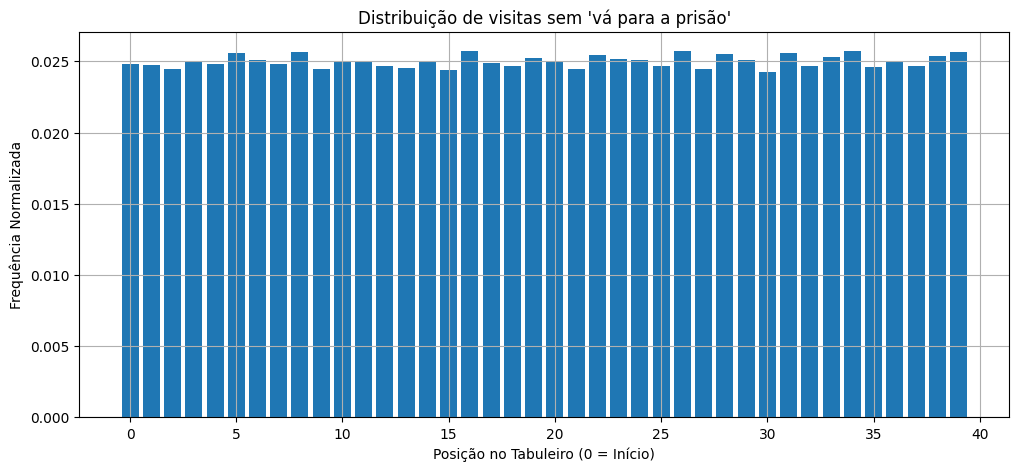


Top propriedades mais visitadas:
Laranja St. James Place: 0.0258
Amarelo Atlantic Avenue: 0.0257
Verde Pennsylvania Avenue: 0.0257
Ciano Vermont Avenue: 0.0257
Azul Boardwalk: 0.0256
Verde Pacific Avenue: 0.0256
Laranja New York Avenue: 0.0253
Vermelho Indiana Avenue: 0.0251
Vermelho Illinois Avenue: 0.0251
Ciano Oriental Avenue: 0.0251
Amarelo Marvin Gardens: 0.0251
Marrom Baltic Avenue: 0.0250
Rosa Virginia Avenue: 0.0250
Rosa St. Charles Place: 0.0249
Marrom Mediterranean Avenue: 0.0247
Laranja Tennessee Avenue: 0.0247
Azul Park Place: 0.0247
Verde North Carolina Avenue: 0.0247
Rosa States Avenue: 0.0246
Amarelo Ventnor Avenue: 0.0245
Vermelho Kentucky Avenue: 0.0244
Ciano Connecticut Avenue: 0.0244

Melhor cor de propriedades: Verde (freq média = 0.0253)


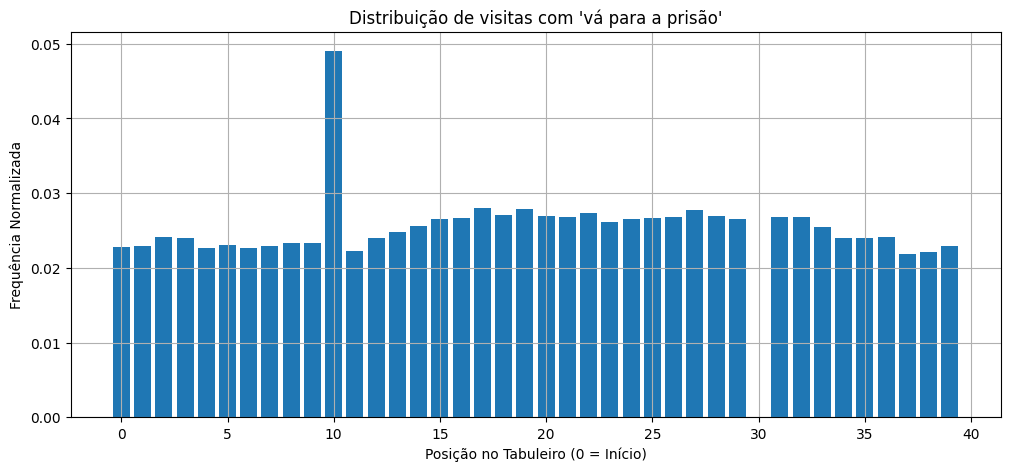


Top propriedades mais visitadas:
Laranja New York Avenue: 0.0279
Amarelo Ventnor Avenue: 0.0277
Laranja Tennessee Avenue: 0.0270
Verde North Carolina Avenue: 0.0268
Vermelho Kentucky Avenue: 0.0268
Verde Pacific Avenue: 0.0268
Amarelo Atlantic Avenue: 0.0268
Laranja St. James Place: 0.0266
Vermelho Illinois Avenue: 0.0266
Amarelo Marvin Gardens: 0.0265
Vermelho Indiana Avenue: 0.0262
Rosa Virginia Avenue: 0.0256
Rosa States Avenue: 0.0249
Marrom Baltic Avenue: 0.0240
Verde Pennsylvania Avenue: 0.0240
Ciano Connecticut Avenue: 0.0234
Ciano Vermont Avenue: 0.0233
Marrom Mediterranean Avenue: 0.0229
Azul Boardwalk: 0.0229
Ciano Oriental Avenue: 0.0226
Rosa St. Charles Place: 0.0223
Azul Park Place: 0.0218

Melhor cor de propriedades: Laranja (freq média = 0.0272)


In [ ]:


def rolar_2d6():
    return np.random.randint(1, 7) + np.random.randint(1, 7)

def simular_banco_imobiliario(n_casas=40, n_passos=100000, considerar_prisao=False):

    visitas = np.zeros(n_casas)
    pos = 0

    for _ in range(n_passos):
        dado = rolar_2d6()
        pos = (pos + dado) % n_casas

        if considerar_prisao and pos == 30:  #vá para a prisão
            pos = 10  #prisão

        visitas[pos] += 1

    return visitas / np.sum(visitas)

def plotar_distribuicao_banco(p, titulo):
    plt.figure(figsize=(12,5))
    plt.bar(range(len(p)), p)
    plt.title(titulo)
    plt.xlabel('Posição no Tabuleiro (0 = Início)')
    plt.ylabel('Frequência Normalizada')
    plt.grid(True)
    plt.show()

def melhores_posicoes(p, propriedades):
    prop_freq = {nome: p[pos] for nome, pos in propriedades.items()}
    melhores = sorted(prop_freq.items(), key=lambda x: x[1], reverse=True)
    print("\nTop propriedades mais visitadas:")
    for nome, freq in melhores:
        print(f"{nome}: {freq:.4f}")

    cores = {}
    for nome, pos in propriedades.items():
        cor = nome.split()[0]  #assume nome do tipo 'Azul Park Place'
        cores.setdefault(cor, []).append(p[pos])
    media_cores = {cor: np.mean(valores) for cor, valores in cores.items()}
    melhor_cor = max(media_cores.items(), key=lambda x: x[1])
    print(f"\nMelhor cor de propriedades: {melhor_cor[0]} (freq média = {melhor_cor[1]:.4f})")

def simular_e_plotar_banco():
    propriedades = {
        'Marrom Baltic Avenue': 3, 'Marrom Mediterranean Avenue': 1,
        'Ciano Oriental Avenue': 6, 'Ciano Vermont Avenue': 8, 'Ciano Connecticut Avenue': 9,
        'Rosa St. Charles Place': 11, 'Rosa States Avenue': 13, 'Rosa Virginia Avenue': 14,
        'Laranja St. James Place': 16, 'Laranja Tennessee Avenue': 18, 'Laranja New York Avenue': 19,
        'Vermelho Kentucky Avenue': 21, 'Vermelho Indiana Avenue': 23, 'Vermelho Illinois Avenue': 24,
        'Amarelo Atlantic Avenue': 26, 'Amarelo Ventnor Avenue': 27, 'Amarelo Marvin Gardens': 29,
        'Verde Pacific Avenue': 31, 'Verde North Carolina Avenue': 32, 'Verde Pennsylvania Avenue': 34,
        'Azul Park Place': 37, 'Azul Boardwalk': 39
    }

    p_sem_prisao = simular_banco_imobiliario(considerar_prisao=False)
    plotar_distribuicao_banco(p_sem_prisao, "Distribuição de visitas sem 'vá para a prisão'")
    melhores_posicoes(p_sem_prisao, propriedades)

    p_com_prisao = simular_banco_imobiliario(considerar_prisao=True)
    plotar_distribuicao_banco(p_com_prisao, "Distribuição de visitas com 'vá para a prisão'")
    melhores_posicoes(p_com_prisao, propriedades)


if __name__ == "__main__":
    simular_e_plotar_banco()